<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# Import torch
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)
# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

2.3.0+cu121
0.18.0+cu121
Using device: cpu


## 1. What are 3 areas in industry where computer vision is currently being used?

In [ ]:
1.Tesla because it is used with automatic driving systems
2.Google Lens:
  A mobile application that uses Computer Vision to analyze the objects the user is looking at through the camera.
  It can display additional information about the object, such as reviews, price, nutritional information, etc.
  Can also translate text Answer questions about locations, etc.
3.Meta (formerly Facebook) uses Computer Vision in a wide range of products and services. To increase efficiency and user experience Notable examples of usage are as follows:
1. Facebook:
  Face recognition:
    It allows users to tag friends in photos.
    Introduce people you may know
    Prevent unauthorized use of your account.
  Content filtering:
    Detect and remove inappropriate content, such as graphic violence.
    Prevent the distribution of obscene content
  Augmented Reality (AR):
    Add AR filters to photos and videos
    Play AR games with friends
  Text translation:
    Translate text in images and videos in real time.
Video analysis:
  Analyze the content of the video to create a description.
  Recommend related videos

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

* Overfitting in machine learning occurs when a model is too complex to learn the details and specific deviations in the training dataset very well. But it doesn't work well when applied to new, never-before-seen data sets. This means that the model is too adaptive to the training data. causing loss of general ability This results in less accurate predictions based on new data.

* For example, If you are training a model to recognize cats from photos And in your training dataset there are cats with a background of carpet patterns. The overfitting model may learn to associate carpet patterns with cats. So when he came across pictures of cats with different backgrounds, It may not be identifiable as a cat.

* In general, We want our models to have the ability to capture common patterns in the data. This allows it to make accurate predictions regardless of new data. Preventing overfitting can be done in a number of ways, such as using more training data. Using model simplification (regularization) or using cross-validation methods (cross-validation)

* การ overfitting ในการเรียนรู้ของเครื่องเกิดขึ้นเมื่อแบบจำลองมีความซับซ้อนมากเกินไปจนสามารถเรียนรู้รายละเอียดและความเบี่ยงเบนที่เฉพาะเจาะจงในชุดข้อมูลการฝึกอบรมได้เป็นอย่างดี แต่กลับไม่สามารถทำงานได้ดีเมื่อนำไปใช้กับชุดข้อมูลใหม่ที่ไม่เคยเห็นมาก่อน นั่นหมายความว่าแบบจำลองนั้นปรับตัวกับข้อมูลการฝึกอบรมมากเกินไป ทำให้สูญเสียความสามารถในการทั่วไป ซึ่งส่งผลให้การทำนายข้อมูลใหม่มีความแม่นยำน้อยลง

* ยกตัวอย่างเช่น หากคุณกำลังฝึกอบรมแบบจำลองให้รู้จักแมวจากภาพถ่าย และในชุดข้อมูลการฝึกอบรมของคุณมีแมวที่มีพื้นหลังเป็นพรมลาย แบบจำลองที่ overfitting อาจเรียนรู้ที่จะเชื่อมโยงลายพรมกับแมว ดังนั้นเมื่อมันเจอภาพของแมวที่มีพื้นหลังแตกต่างกัน มันอาจไม่สามารถระบุได้ว่าเป็นแมว

* โดยทั่วไปแล้ว เราต้องการให้แบบจำลองของเรามีความสามารถในการจับรูปแบบทั่วไปในข้อมูล ซึ่งจะช่วยให้มันสามารถทำนายได้อย่างแม่นยำไม่ว่าจะเจอกับข้อมูลใหม่แบบใดก็ตาม การป้องกัน overfitting สามารถทำได้หลายวิธี เช่น การใช้ข้อมูลการฝึกอบรมที่มากขึ้น การใช้การลดความซับซ้อนของแบบจำลอง (regularization) หรือการใช้วิธีการตรวจสอบแบบไขว้ (cross-validation)

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

การป้องกันการ overfitting ในแมชชีนเลิร์นนิงเป็นเรื่องสำคัญเพื่อให้แบบจำลองของเราสามารถทำงานได้ดีทั้งกับข้อมูลการฝึกอบรมและข้อมูลใหม่ วิธีป้องกันการ overfitting มีหลายวิธี ดังนี้:

1. **การใช้ข้อมูลการฝึกอบรมที่มากขึ้น**:
   - การเพิ่มขนาดของชุดข้อมูลการฝึกอบรมช่วยให้แบบจำลองเรียนรู้รูปแบบที่ทั่วไปมากขึ้น และไม่เรียนรู้เฉพาะรายละเอียดที่ไม่จำเป็น

2. **การลดความซับซ้อนของแบบจำลอง (Regularization)**:
   - ใช้เทคนิคต่างๆ เช่น L1 หรือ L2 regularization เพื่อลดขนาดของพารามิเตอร์ในแบบจำลอง ซึ่งจะช่วยป้องกันการปรับพารามิเตอร์มากเกินไปกับข้อมูลการฝึกอบรม

3. **การใช้การตรวจสอบแบบไขว้ (Cross-validation)**:
   - แบ่งชุดข้อมูลออกเป็นหลายๆ ส่วน และทำการฝึกอบรมและทดสอบแบบจำลองบนส่วนต่างๆ เหล่านี้ ซึ่งจะช่วยให้มั่นใจว่าแบบจำลองทำงานได้ดีบนข้อมูลที่หลากหลาย

4. **การหยุดการฝึกอบรมล่วงหน้า (Early stopping)**:
   - หยุดการฝึกอบรมเมื่อความแม่นยำของแบบจำลองบนชุดข้อมูลการตรวจสอบเริ่มลดลง ซึ่งเป็นสัญญาณว่าแบบจำลองเริ่ม overfit กับข้อมูลการฝึกอบรม

5. **การใช้ข้อมูลการทดสอบที่ไม่เคยเห็นมาก่อน**:
   - แยกชุดข้อมูลการทดสอบออกจากข้อมูลการฝึกอบรมและการตรวจสอบ เพื่อให้มั่นใจว่าแบบจำลองทำงานได้ดีกับข้อมูลใหม่ที่ไม่เคยเห็น

6. **การใช้เทคนิคการสุ่ม (Dropout)**:
   - ในการฝึกอบรมเครือข่ายประสาทเทียม (Neural Network) สามารถใช้เทคนิค dropout ซึ่งเป็นการสุ่มปิดนิวรอนบางส่วนในแต่ละขั้นตอนการฝึกอบรม เพื่อป้องกันไม่ให้นิวรอนพึ่งพาซึ่งกันและกันมากเกินไป

7. **การใช้ชุดข้อมูลการฝึกอบรมที่หลากหลาย**:
   - การใช้ชุดข้อมูลการฝึกอบรมที่มีความหลากหลายทั้งในด้านคุณลักษณะและรูปแบบ ช่วยให้แบบจำลองเรียนรู้รูปแบบทั่วไปมากขึ้น

8. **การใช้ Ensemble Learning**:
   - ใช้เทคนิค Ensemble เช่น การสร้างแบบจำลองหลายตัวและนำผลลัพธ์มารวมกัน (เช่น Random Forest หรือ Gradient Boosting) ช่วยเพิ่มความสามารถในการทั่วไปของแบบจำลอง

การผสมผสานวิธีเหล่านี้เข้าด้วยกันจะช่วยให้แบบจำลองของเรามีประสิทธิภาพมากขึ้นและลดโอกาสการเกิด overfitting ได้อย่างมีประสิทธิภาพ

Preventing overfitting in machine learning is crucial to ensure that our models perform well on both training data and new data. Here are several methods to prevent overfitting:

1. **Using More Training Data**:
   - Increasing the size of the training dataset helps the model learn more general patterns and not just the unnecessary details.

2. **Reducing Model Complexity (Regularization)**:
   - Using techniques like L1 or L2 regularization to reduce the size of the parameters in the model, which helps prevent the model from overfitting the training data.

3. **Using Cross-Validation**:
   - Splitting the dataset into multiple parts and training and testing the model on these different parts to ensure the model performs well on a variety of data.

4. **Early Stopping**:
   - Stopping the training process when the model’s accuracy on the validation dataset starts to decrease, which indicates the model is starting to overfit the training data.

5. **Using a Separate Test Dataset**:
   - Keeping a separate test dataset that the model has never seen before during training and validation to ensure the model performs well on new data.

6. **Using Dropout**:
   - In training neural networks, using the dropout technique, which randomly deactivates certain neurons in each training step to prevent the neurons from becoming too dependent on each other.

7. **Using Diverse Training Data**:
   - Ensuring the training dataset is diverse in terms of features and patterns, which helps the model learn more general patterns.

8. **Using Ensemble Learning**:
   - Applying ensemble techniques like creating multiple models and combining their outputs (e.g., Random Forest or Gradient Boosting) to improve the model's generalization ability.

Combining these methods helps make our models more efficient and significantly reduces the likelihood of overfitting.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [ ]:
train_data = datasets.MNIST(
    root = "data",#where to download data to?
    train = True,#do you want to training dataset yes = True no = Flsae
    download = True,#want to download?
    transform = torchvision.transforms.ToTensor(),#how do you want to transform the data
    target_transform = None # how do we want to tranfrom the labels/targets?
)


In [ ]:
test_data = datasets.MNIST(
    root = "data",#where to download data to?
    train = False,#do you want to training dataset yes = True no = Flsae
    download = True,#want to download?
    transform = ToTensor(),#how do you want to transform the data
    target_transform = None # how do we want to tranfrom the labels/targets?
)

In [ ]:
len(train_data), len(test_data) # ชุดข้อมูลการฝึก (train_data) มีจำนวน 60,000 ตัวอย่างและชุดข้อมูลการทดสอบ (test_data) มีจำนวน 10,000 ตัวอย่าง

(60000, 10000)

In [ ]:
image, label = train_data[0]#เข้าถึงชื่อคลาสทั้งหมดจาก train_data และเก็บไว้ในตัวแปร class_names

image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [ ]:
class_name = train_data.classes #
class_name[:5],label

(['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four'], 5)

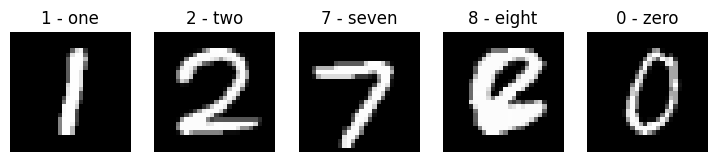

In [ ]:
# Plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))# สร้าง figure object ของ matplotlib ขนาด 9x9 นิ้ว (ขนาดรูปภาพที่จะแสดง)
rows, cols = 1, 5#กำหนดจำนวนแถวและคอลัมน์ของ subplot ในกราฟเป็น 4x4
for i in range(1, rows*cols+1):#วนลูปเพื่อสร้าง subplot ทั้งหมด 16 ช่อง (เนื่องจาก rows*cols = 16)
  random_idx = torch.randint(0, len(train_data), size=[1]).item()# สุ่มเลือกอินเด็กซ์ของข้อมูลจากชุดฝึก train_data
  #โดยใช้ torch.randint โดยขนาดตัวอย่างเท่ากับ 1
  img, label = train_data[random_idx]#ดึงข้อมูลภาพและป้ายกำกับจาก train_data ที่ random_idx ที่เลือกมา
  fig.add_subplot(rows, cols, i)#เพิ่ม subplot ลงใน figure ที่ได้สร้างไว้ ในตำแหน่งที่ i (ที่กำหนดในลูป)
  plt.imshow(img.squeeze(), cmap="gray")#แสดงภาพ img โดยใช้ plt.imshow โดยการใช้ cmap="gray" เพื่อแสดงภาพในลักษณะขาวดำ (grayscale)
  plt.title(class_name[label])#กำหนดชื่อของ subplot จาก class_name ที่มี index เป็น label
  plt.axis(False);#ซ่อนแกนของ subplot เพื่อให้ภาพไม่มีกรอบและไม่มีตัวอ้างอิงตำแหน่งใดๆ

Image 1 shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image 1 label: 5 - five


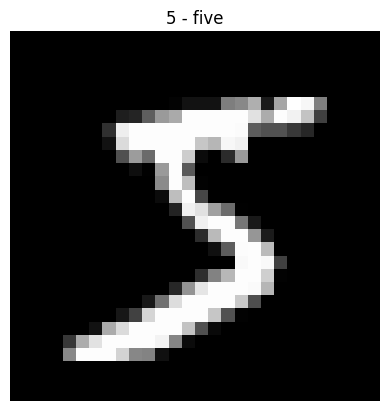

Image 2 shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image 2 label: 0 - zero


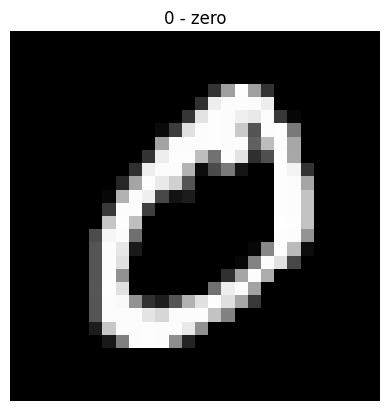

Image 3 shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image 3 label: 4 - four


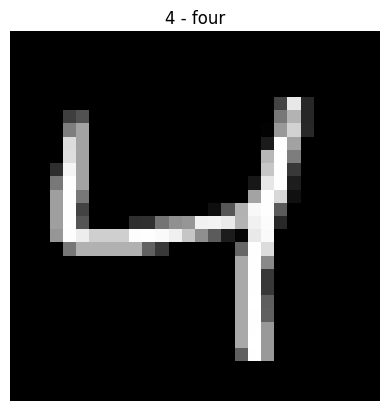

Image 4 shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image 4 label: 1 - one


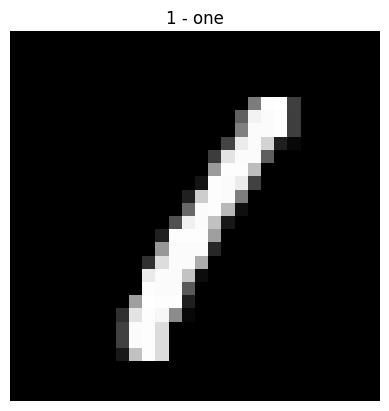

Image 5 shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image 5 label: 9 - nine


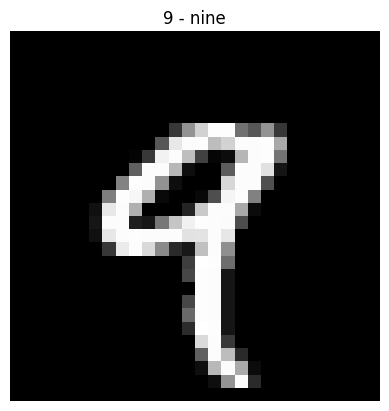

In [ ]:
import matplotlib.pyplot as plt

# แสดง 5 ภาพที่แตกต่างกันจาก train_data
for i in range(5):
    image, label = train_data[i]  # ดึงข้อมูลภาพและป้ายชื่อจาก train_data ทีละภาพ
    print(f"Image {i+1} shape: {image.shape} -> [color_channels, height, width]")
    print(f"Image {i+1} label: {class_name[label]}")

    plt.figure()
    plt.title(class_name[label])  # ใช้ชื่อของคลาสในการตั้งชื่อรูปภาพ
    plt.imshow(image.squeeze(), cmap="gray")  # ลบมิติที่ไม่ต้องการออกและใช้ cmap="gray" เพื่อแสดงภาพขาวดำ
    plt.axis(False)  # ซ่อนแกนของกราฟ
    plt.show()  # แสดงภาพ


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [ ]:
from torch.utils.data import DataLoader
#set up batch size
BATCH_SIZE = 32
# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78404e753850>,
 <torch.utils.data.dataloader.DataLoader at 0x78404e753ee0>)

In [ ]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x78404e753850>, <torch.utils.data.dataloader.DataLoader object at 0x78404e753ee0>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [ ]:
# Check out what's inside the training dataloader

# ใช้ next(iter(train_dataloader)) เพื่อดึง batch แรกออกมาจาก train_dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

# พิมพ์รูปร่างของ train_features_batch และ train_labels_batch
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 1, label size: torch.Size([])


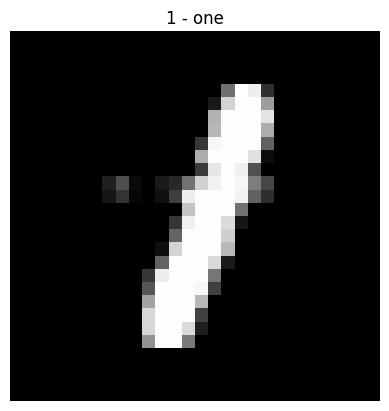

In [ ]:
# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()

# เลือกภาพและป้ายกำกับจากชุดข้อมูล
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

# แสดงภาพโดยใช้ plt.imshow ในโหมด grayscale (cmap="gray")
plt.imshow(img.squeeze(), cmap="gray")

# กำหนดหัวเรื่องของภาพเป็นชื่อคลาสที่สอดคล้องกับป้ายกำกับ
plt.title(class_name[label])

# ซ่อนแกนของภาพเพื่อให้ไม่มีกรอบและไม่มีเลขลำดับตำแหน่ง
plt.axis(False)

# พิมพ์ขนาดของภาพ
print(f"Image size: {img.shape}")

# พิมพ์ป้ายกำกับและขนาดของป้ายกำกับ
print(f"Label: {label}, label size: {label.shape}")


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
#สร้างแบบจำลองCNNอิงจาก -> : https://poloclub.github.io/cnn-explainer/
class MNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG model from CNN explainer website.
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
      super().__init__()
      self.conv_block_1 = nn.Sequential(
          nn.Conv2d(in_channels=input_shape,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2)
      )

      self.conv_block_2 = nn.Sequential(
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2)
      )

      self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=hidden_units*7*7,
                    out_features=output_shape)
      )
    def forward(self, X: torch.Tensor):
      X = self.conv_block_1(X)
      # print(f"Output shape of conv_block_1: {X.shape}")
      X = self.conv_block_2(X)
      # print(f"Output shape of conv_block_2: {X.shape}")
      X = self.classifier(X)
      # print(f"Output classifier : {X.shape}")
      return X

In [ ]:
#Create a new instance
torch.manual_seed(42)
model_2 = MNISTModelV2(input_shape=1,
                               hidden_units=10,
                               output_shape=len(class_name)).to(device)
next(model_2.parameters()).device
model_2

MNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [ ]:
dummy_x_model_2 = torch.rand([1, 1, 28, 28])
model_2(dummy_x_model_2)

tensor([[ 0.0372, -0.0748,  0.0573, -0.0396, -0.0098,  0.0194, -0.0003, -0.0114,
          0.0206,  0.0003]], grad_fn=<AddmmBackward0>)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [ ]:
from urllib import request
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request.urlretrieve(url="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py",
                     filename="helper_functions.py")
  with open("helper_functions.py", "r") as f:
    print(f.read())

helper_functions.py already exists, skipping download...


In [ ]:
#import accuracy metric
from helper_functions import accuracy_fn

#set up loss function
loss_fn = nn.CrossEntropyLoss()

#set up optimizer to optimize model's parameters
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
import torch
from tqdm.auto import tqdm
from timeit import default_timer as timer

# Import your model, loss function, optimizer, and accuracy function
# from your_module import model_2, loss_fn, optimizer, accuracy_fn, train_dataloader, test_dataloader, class_name, device

# Set the seed for reproducibility
torch.manual_seed(42)

# Track the start time for training
train_time_start_on_cpu = timer()

# Move the model to the specified device
model_0 = model_2.to(device)

# Set number of epochs
epochs = 5

# Create training and test loop
for epoch in tqdm(range(epochs), desc="Epochs"):
    print(f"Epoch: {epoch+1}\n-------")

    ### Training
    train_loss = 0
    model_0.train()

    # Loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        # Send data to the target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate the loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()  # Accumulate train loss

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()


    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()

    with torch.inference_mode():
        for X, y in test_dataloader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate the loss
            test_loss += loss_fn(test_pred, y).item()

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)
        # Calculate the test acc average per batch
        test_acc /= len(test_dataloader)

    # Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1
-------

Train loss: 0.03777 | Test loss: 0.04214, Test acc: 98.65%

Epoch: 2
-------

Train loss: 0.03651 | Test loss: 0.05451, Test acc: 98.33%

Epoch: 3
-------

Train loss: 0.03425 | Test loss: 0.04261, Test acc: 98.69%

Epoch: 4
-------

Train loss: 0.03357 | Test loss: 0.04132, Test acc: 98.60%

Epoch: 5
-------

Train loss: 0.03136 | Test loss: 0.03828, Test acc: 98.63%

Train time on cpu: 277.870 seconds


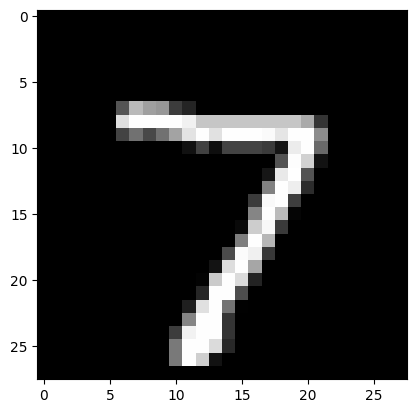

In [ ]:
plt.imshow(test_data[0][0].squeeze(), cmap="gray")

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)
      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)
      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      # Get pred_prob off the gpu for further calculations
      pred_probs.append(pred_prob.cpu())
  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [ ]:
import random
# random.seed(7)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)
#view the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, '2 - two')

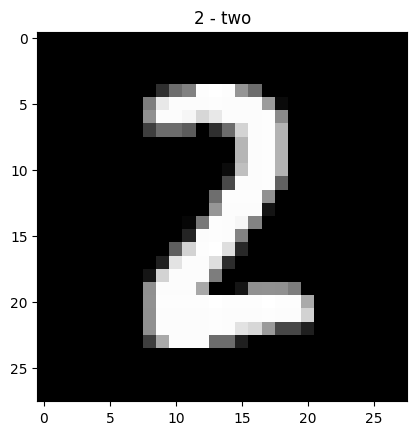

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_name[test_labels[0]])

In [ ]:
#make prediction probabilities to lables
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
pred_probs[:10]

tensor([[1.6618e-10, 3.5724e-07, 1.0000e+00, 6.4260e-08, 1.5345e-13, 1.6406e-15,
         4.3931e-11, 2.2475e-07, 1.7621e-06, 4.1921e-12],
        [5.4164e-16, 3.8253e-14, 7.4398e-11, 1.0000e+00, 2.9259e-16, 2.0668e-09,
         1.1287e-17, 9.7609e-10, 7.7186e-12, 2.6970e-13],
        [1.2402e-06, 9.9929e-01, 4.1215e-04, 4.1389e-08, 1.5003e-04, 1.2965e-08,
         6.9128e-07, 1.3114e-04, 1.1068e-05, 2.2150e-07],
        [1.4935e-12, 1.3033e-16, 2.4156e-11, 1.4493e-11, 2.8285e-06, 4.2643e-11,
         7.0709e-16, 1.9549e-08, 1.4064e-08, 1.0000e+00],
        [7.9848e-15, 1.9506e-10, 1.0000e+00, 4.4620e-07, 1.5550e-11, 1.6948e-12,
         3.5548e-14, 1.6445e-06, 5.3198e-11, 8.1823e-12],
        [1.2780e-13, 4.9864e-11, 6.6145e-08, 1.0000e+00, 2.4269e-11, 1.6969e-07,
         7.1307e-15, 9.4549e-07, 1.8498e-08, 1.7445e-08],
        [4.1205e-08, 4.4911e-10, 9.9999e-01, 1.9395e-06, 5.1735e-12, 8.4308e-10,
         1.4094e-12, 1.8830e-07, 4.4745e-06, 2.9777e-10],
        [9.7554e-08, 4.4103

In [ ]:
#convert prediction probabilities to lables
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 3, 1, 9, 2, 3, 2, 2, 4])

In [ ]:
test_labels

[2, 3, 1, 9, 2, 3, 2, 2, 4]

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

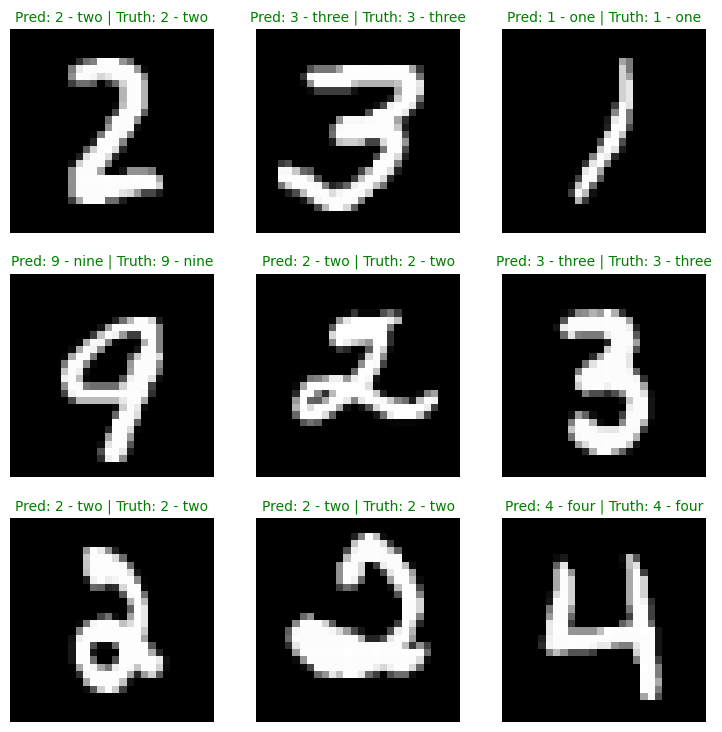

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_name[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_name[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False);

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [ ]:

# Import tqdm.auto
from tqdm.auto import tqdm


# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor


Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([7, 2, 1,  ..., 4, 5, 6])

In [ ]:
# See if required packages are installed and if not, install them...
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 22.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinu

In [ ]:
import mlxtend
class_name

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
#2. set up confusion matrix torchmetrics.ConfusionMatrix
comfmat = ConfusionMatrix(task='multiclass',num_classes=len(class_name))
comfmat_tensor = comfmat(preds=y_pred_tensor,
                         target=test_data.targets)
comfmat_tensor

tensor([[ 944,    3,    2,    0,    1,    3,   16,    2,    7,    2],
        [   0, 1130,    0,    0,    1,    0,    2,    1,    1,    0],
        [   6,   66,  913,    6,    0,    0,    3,   12,   25,    1],
        [   3,    8,   10,  934,    4,   24,    1,   12,    9,    5],
        [   4,   28,    2,    1,  877,    1,   10,   13,   12,   34],
        [   0,    2,    1,   23,    3,  794,   19,    3,   15,   32],
        [  13,   12,    0,    1,    2,    8,  910,    0,   12,    0],
        [   2,   43,   12,   11,    9,    0,    0,  931,    0,   20],
        [   7,    8,   10,    4,    5,    7,    7,    4,  909,   13],
        [   2,    8,    2,    3,   23,    3,    1,   17,   17,  933]])

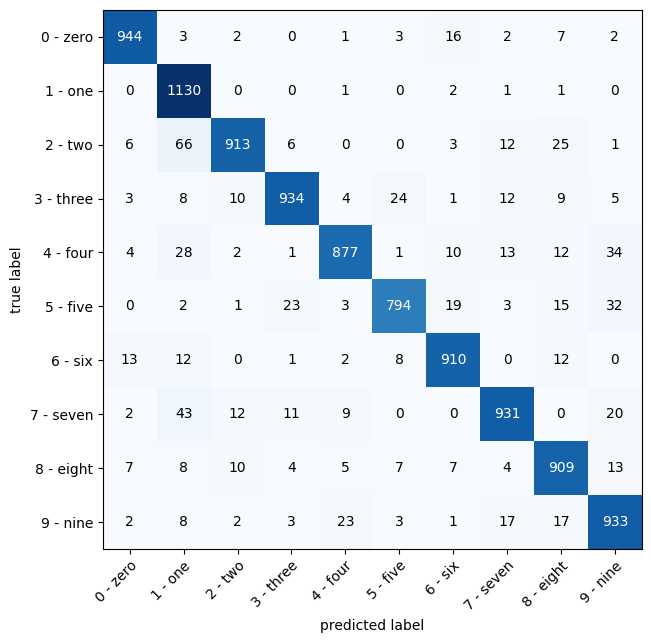

In [ ]:
fig, ax = plot_confusion_matrix(
    conf_mat=comfmat_tensor.numpy(), # confusion matrix
    class_names=class_name, # class names
    figsize=(10, 7)
)

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [ ]:
train_data = datasets.FashionMNIST(
    root = "data",#where to download data to?
    train = True,#do you want to training dataset yes = True no = Flsae
    download = True,#want to download?
    transform = torchvision.transforms.ToTensor(),#how do you want to transform the data
    target_transform = None # how do we want to tranfrom the labels/targets?
)

In [ ]:
test_data = datasets.FashionMNIST(
    root = "data",#where to download data to?
    train = False,#do you want to training dataset yes = True no = Flsae
    download = True,#want to download?
    transform = ToTensor(),#how do you want to transform the data
    target_transform = None # how do we want to tranfrom the labels/targets?
)

In [ ]:
image, label = train_data[0]#เข้าถึงชื่อคลาสทั้งหมดจาก train_data และเก็บไว้ในตัวแปร class_names

image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_name = train_data.classes #
class_name[:10],label

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 9)

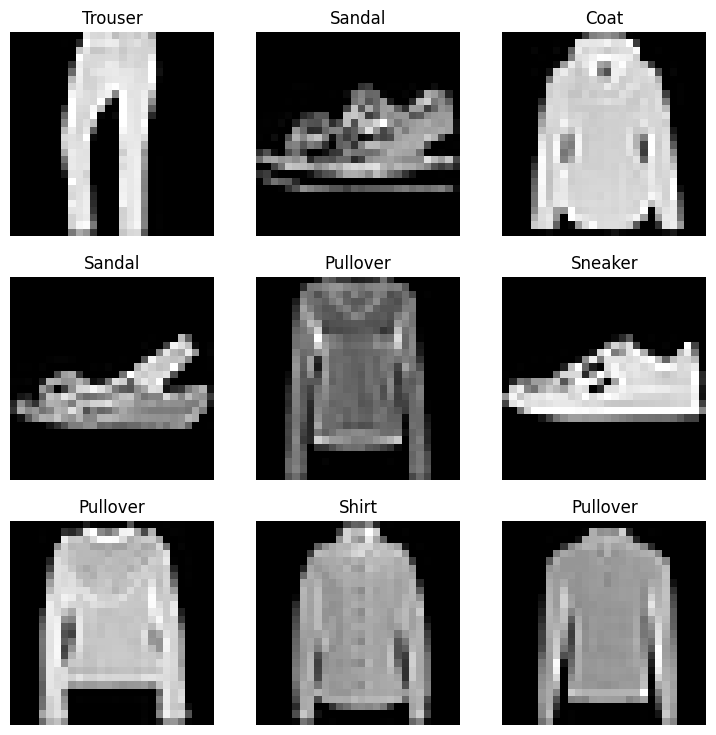

In [ ]:
# Plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))# สร้าง figure object ของ matplotlib ขนาด 9x9 นิ้ว (ขนาดรูปภาพที่จะแสดง)
rows, cols = 3, 3#กำหนดจำนวนแถวและคอลัมน์ของ subplot ในกราฟเป็น 4x4
for i in range(1, rows*cols+1):#วนลูปเพื่อสร้าง subplot ทั้งหมด 16 ช่อง (เนื่องจาก rows*cols = 16)
  random_idx = torch.randint(0, len(train_data), size=[1]).item()# สุ่มเลือกอินเด็กซ์ของข้อมูลจากชุดฝึก train_data
  #โดยใช้ torch.randint โดยขนาดตัวอย่างเท่ากับ 1
  img, label = train_data[random_idx]#ดึงข้อมูลภาพและป้ายกำกับจาก train_data ที่ random_idx ที่เลือกมา
  fig.add_subplot(rows, cols, i)#เพิ่ม subplot ลงใน figure ที่ได้สร้างไว้ ในตำแหน่งที่ i (ที่กำหนดในลูป)
  plt.imshow(img.squeeze(), cmap="gray")#แสดงภาพ img โดยใช้ plt.imshow โดยการใช้ cmap="gray" เพื่อแสดงภาพในลักษณะขาวดำ (grayscale)
  plt.title(class_name[label])#กำหนดชื่อของ subplot จาก class_name ที่มี index เป็น label
  plt.axis(False);#ซ่อนแกนของ subplot เพื่อให้ภาพไม่มีกรอบและไม่มีตัวอ้างอิงตำแหน่งใดๆ

In [ ]:
#สร้างแบบจำลองCNNอิงจาก -> : https://poloclub.github.io/cnn-explainer/
class FashionMNISTModel0(nn.Module):
    """
    Model architecture that replicates the TinyVGG model from CNN explainer website.
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
      super().__init__()
      self.conv_block_1 = nn.Sequential(
          nn.Conv2d(in_channels=input_shape,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2)
      )

      self.conv_block_2 = nn.Sequential(
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2)
      )

      self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=hidden_units*7*7,
                    out_features=output_shape)
      )
    def forward(self, X: torch.Tensor):
      X = self.conv_block_1(X)
      # print(f"Output shape of conv_block_1: {X.shape}")
      X = self.conv_block_2(X)
      # print(f"Output shape of conv_block_2: {X.shape}")
      X = self.classifier(X)
      # print(f"Output classifier : {X.shape}")
      return X

In [ ]:
from torch.utils.data import DataLoader
#set up batch size
BATCH_SIZE = 32
# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x784030bd3250>,
 <torch.utils.data.dataloader.DataLoader at 0x784030bd2e30>)

In [ ]:
#Create a new instance
torch.manual_seed(42)
model_3 = FashionMNISTModel0(input_shape=1,
                               hidden_units=10,
                               output_shape=len(class_name)).to(device)
next(model_3.parameters()).device
model_3

FashionMNISTModel0(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_3.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [ ]:
# Setup loss and optimizer
from torch import nn
#import accuracy metric
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [ ]:
import torch
from tqdm.auto import tqdm
from timeit import default_timer as timer

# Set the seed for reproducibility
torch.manual_seed(42)

# Track the start time for training
train_time_start_on_cpu = timer()

# Move the model to the specified device
model = model_3

# Set number of epochs
epochs = 5

# Create training and test loop
for epoch in tqdm(range(epochs), desc="Epochs"):
    print(f"Epoch: {epoch + 1}\n-------")

    ### Training
    train_loss = 0
    model.train()

    # Loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        # Send data to the target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate the loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()  # Accumulate train loss

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model.eval()

    with torch.inference_mode():
        for X, y in test_dataloader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate the loss
            test_loss += loss_fn(test_pred, y).item()

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)
        # Calculate the test acc average per batch
        test_acc /= len(test_dataloader)

    # Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model.parameters()).device))

# Assuming print_train_time is a function you have defined
def print_train_time(start, end, device):
    total_time = end - start
    print(f"\nTraining time on {device}: {total_time:.3f} seconds")
    return total_time


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1
-------

Train loss: 2.30228 | Test loss: 2.30231, Test acc: 9.99%

Epoch: 2
-------

Train loss: 2.30228 | Test loss: 2.30231, Test acc: 9.99%

Epoch: 3
-------

Train loss: 2.30228 | Test loss: 2.30231, Test acc: 9.99%

Epoch: 4
-------

Train loss: 2.30228 | Test loss: 2.30231, Test acc: 9.99%

Epoch: 5
-------

Train loss: 2.30228 | Test loss: 2.30231, Test acc: 9.99%


Training time on cpu: 292.796 seconds


In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)
      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)
      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      # Get pred_prob off the gpu for further calculations
      pred_probs.append(pred_prob.cpu())
  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [ ]:
import random
# random.seed(7)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)
#view the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Shirt')

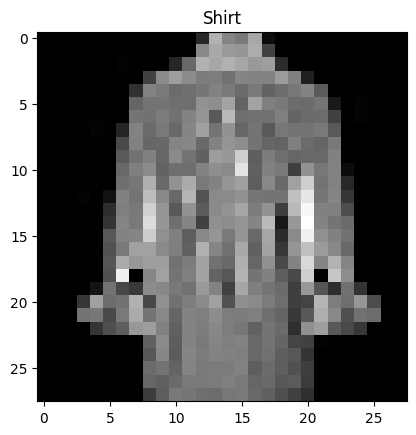

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_name[test_labels[0]])


In [ ]:
#make prediction probabilities to lables
pred_probs = make_predictions(model=model_3,
                              data=test_samples)
pred_probs[:10]

tensor([[0.1034, 0.0936, 0.1049, 0.0969, 0.0986, 0.1014, 0.0993, 0.0985, 0.1025,
         0.1010],
        [0.1028, 0.0942, 0.1052, 0.0969, 0.0986, 0.1010, 0.0994, 0.0991, 0.1019,
         0.1010],
        [0.1035, 0.0934, 0.1054, 0.0962, 0.0992, 0.1016, 0.0995, 0.0986, 0.1023,
         0.1003],
        [0.1036, 0.0934, 0.1054, 0.0970, 0.0988, 0.1015, 0.0994, 0.0984, 0.1023,
         0.1002],
        [0.1036, 0.0934, 0.1048, 0.0965, 0.0995, 0.1017, 0.0998, 0.0976, 0.1026,
         0.1003],
        [0.1039, 0.0934, 0.1051, 0.0964, 0.0991, 0.1016, 0.0992, 0.0980, 0.1026,
         0.1007],
        [0.1033, 0.0937, 0.1055, 0.0964, 0.0988, 0.1013, 0.0994, 0.0986, 0.1023,
         0.1006],
        [0.1035, 0.0936, 0.1045, 0.0967, 0.0991, 0.1017, 0.0993, 0.0983, 0.1026,
         0.1005],
        [0.1030, 0.0936, 0.1058, 0.0967, 0.0983, 0.1012, 0.0998, 0.0990, 0.1019,
         0.1007]])

In [ ]:
#convert prediction probabilities to lables
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
test_labels

[6, 8, 2, 3, 1, 3, 4, 1, 9]

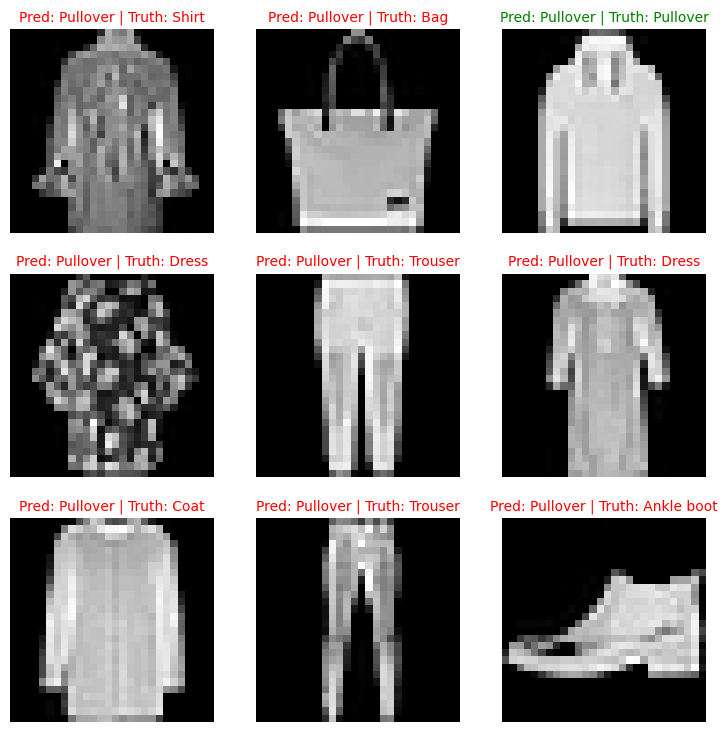

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_name[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_name[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False);